# TelecomChurn
## Objective - Predict which customers are at high risk of churn.
1. Retaining high profitable customers is the number one business goal.
	Sub Goals - 
	a. Recognize the High Profitable customers.
	b. Confirm if they are leaving.
2. Confirm which customers are at high risk of churning.
3. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful. - last Month if churn found.

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import warnings 
warnings.simplefilter('ignore')

In [2]:
churn_df = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn_df.shape

(99999, 226)

In [5]:
churn_df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

## EDA - Exploratory Data Analysis
This includes data preparation and checking which data is providing more information.

In [6]:
sortCount = pd.DataFrame(churn_df.isnull().sum()/churn_df.shape[0], columns=["Count"]).sort_values(by="Count", ascending=False)

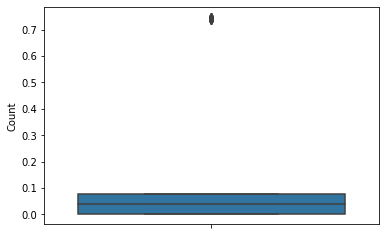

In [7]:
sns.boxplot(y=sortCount["Count"])

Here you can see the some churn columns have 70% null, and the rest of the columns have max 1% data as null.
Thus the data preparation needs to be done accordingly.

In [8]:
sortCount[sortCount["Count"]>=0.7].index.values

array(['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6',
       'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6',
       'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
       'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7',
       'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7',
       'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7',
       'total_rech_data_9', 'count_rech_3g_9', 'fb_user_9',
       'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9',
       'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9',
       'av_rech_amt_data_9', 'total_rech_data_8', 'arpu_3g_8',
       'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8',
       'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8',
       'count_rech_2g_8', 'date_of_last_rech_data_8'], dtype=object)

Above are the columns which have little important data. Lets check the unique values present in the above columns to check if any valuable information is present in the given columns

In [9]:
for val in sortCount[sortCount["Count"]>=0.7].index.values:
    print("Column - ", val, " has given unique values - ",churn_df[val].unique())

Column -  arpu_3g_6  has given unique values -  [212.17    nan   0.   ...  76.93 141.48 235.68]
Column -  night_pck_user_6  has given unique values -  [ 0. nan  1.]
Column -  total_rech_data_6  has given unique values -  [ 1. nan  3.  5.  4.  2.  6.  8.  7. 12. 16. 11. 10. 14. 20.  9. 18. 29.
 23. 15. 22. 27. 17. 21. 13. 19. 35. 25. 33. 61. 55. 24. 26. 28. 40. 32.
 46. 34.]
Column -  arpu_2g_6  has given unique values -  [212.17    nan   0.   ...  91.82  36.14  18.68]
Column -  max_rech_data_6  has given unique values -  [2.520e+02       nan 5.600e+01 1.540e+02 2.500e+01 2.740e+02 1.980e+02
 2.300e+01 1.400e+01 6.550e+02 9.800e+01 1.250e+02 4.100e+01 1.450e+02
 4.600e+01 1.520e+02 1.700e+01 4.900e+01 9.100e+01 1.790e+02 1.490e+02
 2.900e+01 1.770e+02 4.550e+02 8.000e+00 1.000e+00 3.300e+01 1.500e+01
 5.050e+02 4.800e+01 2.020e+02 4.490e+02 6.100e+01 2.200e+01 5.200e+01
 7.550e+02 5.000e+00 1.010e+02 9.000e+00 9.510e+02 2.950e+02 1.555e+03
 1.505e+03 8.550e+02 9.950e+02 1.300e+01 1.255e

There seems to be some data present, we can check if the data is required with the data dictionary.

In [10]:
sortCount[sortCount["Count"]<0.7].index.values

array(['ic_others_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9',
       'std_ic_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'spl_ic_mou_9',
       'og_others_9', 'loc_ic_t2t_mou_9', 'std_ic_t2o_mou_9',
       'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9',
       'roam_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'roam_ic_mou_9', 'offnet_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_t2t_mou_9', 'std_og_t2m_mou_9', 'onnet_mou_9',
       'onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8',
       'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_ic_mou_8',
       'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'offnet_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8',
       'isd_og_mou_8', 'ic_others_8', 'og_others_8', 'spl_ic_mou_8',
       'loc_og_t2f_mou_8', 'std_o

In [11]:
churn_df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

lets check what is the output of the churn data, this is done to understand the context of the 70% empty columns:
1. The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.
2. The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

As the data is arranged between multiple columns, lets first check what are teh unique columns available, so that we can focus if any EDA can be done in total across the dataset.

In [12]:
uniqueColList = [];
for val in churn_df.columns:
    if((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") ):
        uniqueColList.append(val[:-2])
    elif((val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep") ):
        uniqueColList.append(val[4:])
        

In [13]:
set(uniqueColList)

{'arpu',
 'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech',
 'date_of_last_rech_data',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_date_of_month',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [14]:
dataNotFound = [];
for val in sortCount[sortCount["Count"]>=0.7].index.values:
    if((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") ):
        dataNotFound.append(val[:-2])
    elif((val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep") ):
        dataNotFound.append(val[4:])
        

In [15]:
dataNotFound

['arpu_3g',
 'night_pck_user',
 'total_rech_data',
 'arpu_2g',
 'max_rech_data',
 'fb_user',
 'av_rech_amt_data',
 'date_of_last_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech_data',
 'total_rech_data',
 'fb_user',
 'max_rech_data',
 'night_pck_user',
 'count_rech_2g',
 'av_rech_amt_data',
 'arpu_2g',
 'count_rech_3g',
 'arpu_3g',
 'total_rech_data',
 'count_rech_3g',
 'fb_user',
 'max_rech_data',
 'arpu_3g',
 'date_of_last_rech_data',
 'night_pck_user',
 'arpu_2g',
 'count_rech_2g',
 'av_rech_amt_data',
 'total_rech_data',
 'arpu_3g',
 'fb_user',
 'night_pck_user',
 'av_rech_amt_data',
 'max_rech_data',
 'count_rech_3g',
 'arpu_2g',
 'count_rech_2g',
 'date_of_last_rech_data']

In [16]:
sortCount

,Count
arpu_3g_6,0.748467
night_pck_user_6,0.748467
total_rech_data_6,0.748467
arpu_2g_6,0.748467
max_rech_data_6,0.748467
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


I am trying to view overall what columns are present and how much of data is present in the churn_df, just to understand the overall data strength
Created DataFrame - 
ColumnName|Jun|Jul|Aug|Sep|

In [17]:
dataStrength_df = pd.DataFrame(columns=["ColumnName", "Jun", "Jul", "Aug", "Sep"])

In [18]:
dataStrength_df.head()

,ColumnName,Jun,Jul,Aug,Sep


In [19]:
dataStrength_df["ColumnName"] = list(set(uniqueColList))

In [20]:
primaryColList=["Jun", "Jul", "Aug", "Sep"]
monthList = ["_6", "_7", "_8", "_9"]
startList = ["jun_", "jul_", "aug_", "sep_"]
for val in set(uniqueColList):    
    for index, dat in enumerate(monthList):
        colName1 = val+dat;
        colName2 = startList[index]+val;
        if(colName1 in churn_df.columns.values.tolist()):
            dataStrength_df.loc[dataStrength_df["ColumnName"]==val, primaryColList[index]] = churn_df[colName1].isnull().sum()/churn_df.shape[0]
        elif(colName2 in churn_df.columns.values.tolist()):
            dataStrength_df.loc[dataStrength_df["ColumnName"]==val, primaryColList[index]] = churn_df[colName2].isnull().sum()/churn_df.shape[0]

            

In [21]:
dataStrength_df.set_index("ColumnName", inplace=True)
dataStrength_df.sort_values(by="ColumnName")

,Jun,Jul,Aug,Sep
ColumnName,,,,
arpu,0,0,0,0
arpu_2g,0.748467,0.744287,0.736607,0.740777
arpu_3g,0.748467,0.744287,0.736607,0.740777
av_rech_amt_data,0.748467,0.744287,0.736607,0.740777
count_rech_2g,0.748467,0.744287,0.736607,0.740777
count_rech_3g,0.748467,0.744287,0.736607,0.740777
date_of_last_rech,0.0160702,0.0176702,0.0362204,0.0476005
date_of_last_rech_data,0.748467,0.744287,0.736607,0.740777
fb_user,0.748467,0.744287,0.736607,0.740777


In [22]:
dataStrength_df["Jun"] = dataStrength_df["Jun"].astype("float")
dataStrength_df["Jul"] = dataStrength_df["Jul"].astype("float")
dataStrength_df["Aug"] = dataStrength_df["Aug"].astype("float")
dataStrength_df["Sep"] = dataStrength_df["Sep"].astype("float")

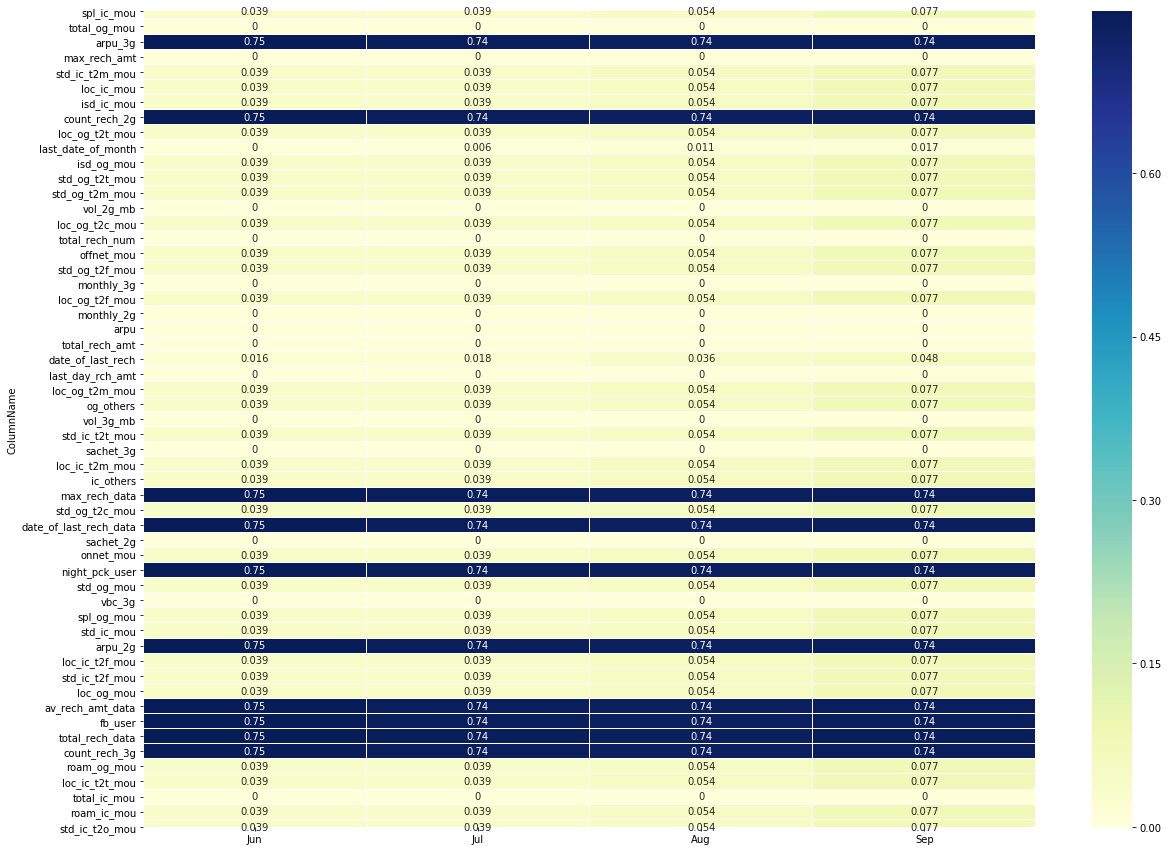

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(dataStrength_df, annot=True, linewidths=.1, cmap="YlGnBu")

In [24]:
dataStrength_df.sort_values(["Jun", "Jul", "Aug", "Sep"], ascending=False)

,Jun,Jul,Aug,Sep
ColumnName,,,,
arpu_3g,0.748467,0.744287,0.736607,0.740777
count_rech_2g,0.748467,0.744287,0.736607,0.740777
max_rech_data,0.748467,0.744287,0.736607,0.740777
date_of_last_rech_data,0.748467,0.744287,0.736607,0.740777
night_pck_user,0.748467,0.744287,0.736607,0.740777
arpu_2g,0.748467,0.744287,0.736607,0.740777
av_rech_amt_data,0.748467,0.744287,0.736607,0.740777
fb_user,0.748467,0.744287,0.736607,0.740777
total_rech_data,0.748467,0.744287,0.736607,0.740777


From this data, below hypothesis can be found:
1. total_rech_data null data is increasing from Jun to Jul.
2. Wherease teh max_rech_data, Count_rech_3g, av_rech_amt_data, data_of_last_rech_data, fb_user, arpu_3g, count_rech_2g, arpu_2g, night_pck_user null count is decreasing from Jun to Jul.
3. For the rest of the data small quantity of null data is increasing from Jun->Jul->Aug->Sep.

Lets visualize the given columns and amount of data available for the given exceeding empty columns
1. max_rech_data
2. count_rech_2g
3. arpu_2g
4. av_rech_amt_data
5. total_rech_data
6. fb_user
7. count_rech_3g
8. arpu_3g
9. night_pck_user
10. date_of_last_rech_data

In [25]:
churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", 
                     "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9",
         "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]]

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,252.0,252.0,252.0,NaN
1,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,25.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
99997,202.0,179.0,179.0,252.0,1.0,0.0,0.0,0.0,583.0,358.0,716.0,862.0


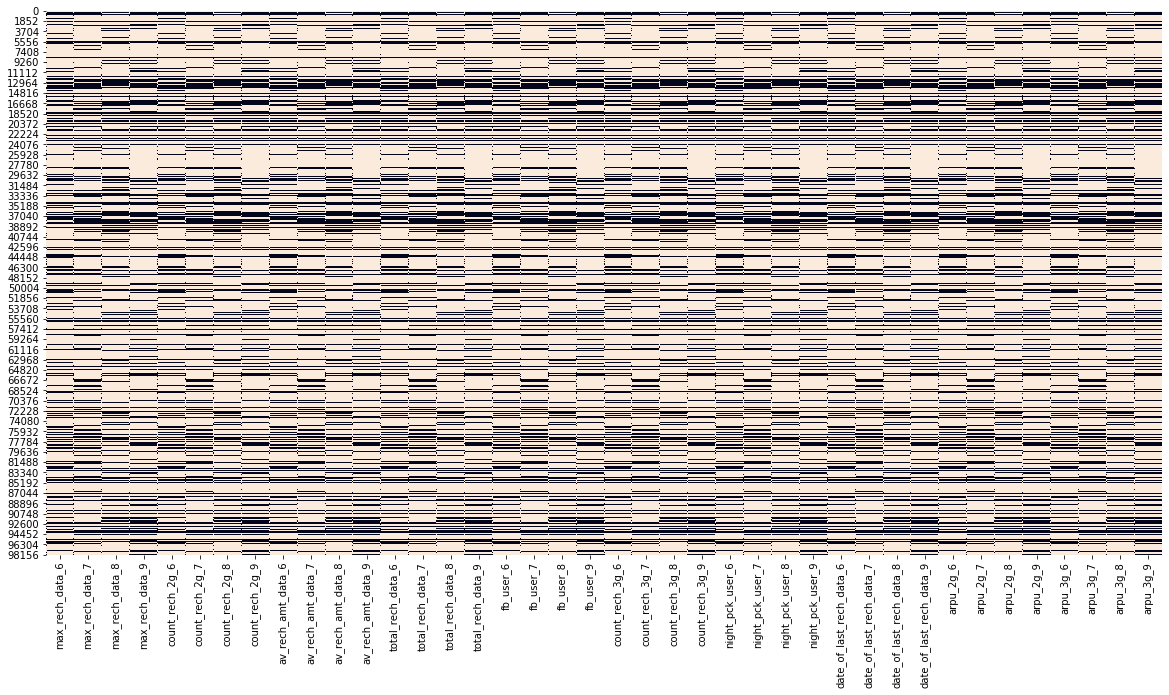

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(churn_df[["max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", 
                     "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9",
         "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9",
        "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9",
        "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9", 
        "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9",
        "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9",
        "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9",
        "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9",
        "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9"]].isnull(), cbar=False)

Here if you notice the customers who don't have data continue to have no data in the rest of the columns. But the columns which have data mostly continue to have data.

In [27]:
for data in churn_df.columns.values.tolist():
    print("Column ", data, " has ", churn_df[data].nunique(), " unique number of records.")
    if(churn_df[data].nunique()==1):
        print("\tUnique Values :", churn_df[data].unique())

Column  mobile_number  has  99999  unique number of records.
Column  circle_id  has  1  unique number of records.
	Unique Values : [109]
Column  loc_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  std_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  loc_ic_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  last_date_of_month_6  has  1  unique number of records.
	Unique Values : ['6/30/2014']
Column  last_date_of_month_7  has  1  unique number of records.
	Unique Values : ['7/31/2014' nan]
Column  last_date_of_month_8  has  1  unique number of records.
	Unique Values : ['8/31/2014' nan]
Column  last_date_of_month_9  has  1  unique number of records.
	Unique Values : ['9/30/2014' nan]
Column  arpu_6  has  85681  unique number of records.
Column  arpu_7  has  85308  unique number of records.
Column  arpu_8  has  83615  unique number of records.
Column  arpu_9  has  79937  unique number of records.


Column  count_rech_2g_8  has  34  unique number of records.
Column  count_rech_2g_9  has  32  unique number of records.
Column  count_rech_3g_6  has  25  unique number of records.
Column  count_rech_3g_7  has  28  unique number of records.
Column  count_rech_3g_8  has  29  unique number of records.
Column  count_rech_3g_9  has  27  unique number of records.
Column  av_rech_amt_data_6  has  887  unique number of records.
Column  av_rech_amt_data_7  has  961  unique number of records.
Column  av_rech_amt_data_8  has  973  unique number of records.
Column  av_rech_amt_data_9  has  945  unique number of records.
Column  vol_2g_mb_6  has  15201  unique number of records.
Column  vol_2g_mb_7  has  15114  unique number of records.
Column  vol_2g_mb_8  has  14994  unique number of records.
Column  vol_2g_mb_9  has  13919  unique number of records.
Column  vol_3g_mb_6  has  13773  unique number of records.
Column  vol_3g_mb_7  has  14519  unique number of records.
Column  vol_3g_mb_8  has  1496

Here we notice some columns [std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9]  which don't have any other than [nan  0.]. Thus either these data are categories or have no important information.

In [28]:
churn_df.drop(columns=["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"], inplace=True)

Also the columns last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 - just contain the last date for paying the bill, Can be deleted after just noting the given data values.
1. Column  last_date_of_month_6  has  1  unique number of records.
	Unique Values : ['6/30/2014']
2. Column  last_date_of_month_7  has  1  unique number of records.
	Unique Values : ['7/31/2014' nan]
3. Column  last_date_of_month_8  has  1  unique number of records.
	Unique Values : ['8/31/2014' nan]
4. Column  last_date_of_month_9  has  1  unique number of records.
	Unique Values : ['9/30/2014' nan]
    
the June month all the customers are active users.
Also we can note that for the last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 there is nan value. This means that the customers have probably churned on those given months. Thus lets convert the given columns to churnedon_7, churnedon_8, churned_9.


In [29]:

churn_df["churnedon_7"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_7"]]
churn_df["churnedon_8"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_8"]]
churn_df["churnedon_9"] = [1 if(val!=val) else 0 for val in churn_df["last_date_of_month_9"]]

In [30]:
churn_df.drop(columns=["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9"], inplace=True)

Lets see the percentage of churned customers per month.

In [31]:
print("Percentage of users churning on July - \n", churn_df["churnedon_7"].value_counts()/churn_df.shape[0])
print("Percentage of users churning on August - \n", churn_df["churnedon_8"].value_counts()/churn_df.shape[0])
print("Percentage of users churning on September - \n", churn_df["churnedon_9"].value_counts()/churn_df.shape[0])

Percentage of users churning on July - 
 0    0.99399
1    0.00601
Name: churnedon_7, dtype: float64
Percentage of users churning on August - 
 0    0.989
1    0.011
Name: churnedon_8, dtype: float64
Percentage of users churning on September - 
 0    0.98341
1    0.01659
Name: churnedon_9, dtype: float64


There seems to be a loss of customers 
1. July -> August : 0.00499‬
2. August -> September : 0.00559<br>
<b>Overall at the rate of 0.4%</b>

Now there are other columns ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9"] and ["fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"] who have only 2 unique records. Lets analyse and see if any categorical values can be created

In [32]:
print("night_pck_user_6 - ", churn_df["night_pck_user_6"].unique())
print("night_pck_user_7 - ", churn_df["night_pck_user_7"].unique())
print("night_pck_user_8 - ", churn_df["night_pck_user_8"].unique())
print("night_pck_user_9 - ", churn_df["night_pck_user_9"].unique())

print("fb_user_6 - ", churn_df["fb_user_6"].unique())
print("fb_user_7 - ", churn_df["fb_user_7"].unique())
print("fb_user_8 - ", churn_df["fb_user_8"].unique())
print("fb_user_9 - ", churn_df["fb_user_9"].unique())


night_pck_user_6 -  [ 0. nan  1.]
night_pck_user_7 -  [ 0. nan  1.]
night_pck_user_8 -  [ 0. nan  1.]
night_pck_user_9 -  [nan  0.  1.]
fb_user_6 -  [ 1. nan  0.]
fb_user_7 -  [ 1. nan  0.]
fb_user_8 -  [ 1. nan  0.]
fb_user_9 -  [nan  1.  0.]


Obviously the above columns are showing some categories. 
fb_user(Extra service for Facebook) = {1:"Yes", 0:"No", nan:"Unknown"}
night_pck_user(Night Prepaid Service) = {1:"Yes", 0:"No", nan:"Unknown"}
The above categories mean something, this nothing more would be done on the column

Also lets see which columns are not month based

In [33]:
colUnique= []
for val in churn_df.columns.values.tolist():
    boolFound = False;
    if(not((val[-1]=="6") or(val[-1]=="7") or(val[-1]=="8") or(val[-1]=="9") 
      or (val[:3]=="jun") or(val[:3]=="jul") or(val[:3]=="aug") or(val[:3]=="sep"))):
        colUnique.append(val)

In [34]:
colUnique

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'aon']

In [35]:
churn_df["mobile_number"].nunique()

99999

Here we see that mobile_number is the unique column for each customers

In [36]:
for data in colUnique:
    print("Column ", data, " has ", churn_df[data].nunique(), " unique number of records.")
    if(churn_df[data].nunique()==1):
        print("\tUnique Values :", churn_df[data].unique())

Column  mobile_number  has  99999  unique number of records.
Column  circle_id  has  1  unique number of records.
	Unique Values : [109]
Column  loc_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  std_og_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  loc_ic_t2o_mou  has  1  unique number of records.
	Unique Values : [ 0. nan]
Column  aon  has  3489  unique number of records.


Here we notice that circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou has only one value. Thus are mostly not useful.
We can delete these values

In [37]:
churn_df.drop(columns=["circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], inplace=True)

In [38]:
churn_df.dtypes[churn_df.dtypes=="object"]

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [39]:
print(churn_df["date_of_last_rech_6"].unique())
print(churn_df["date_of_last_rech_7"].unique())
print(churn_df["date_of_last_rech_8"].unique())
print(churn_df["date_of_last_rech_9"].unique())

['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '8/22/2014' '8/2/2014' '8/13/2014' '8/5/2014'
 '8/18/2014' '8/20/2014' '8/23/2014' '8/12/2014' 

In [40]:
print(churn_df["date_of_last_rech_data_6"].unique())
print(churn_df["date_of_last_rech_data_7"].unique())
print(churn_df["date_of_last_rech_data_8"].unique())
print(churn_df["date_of_last_rech_data_9"].unique())

['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014' '8/17/2014' '8/14/2014'
 '8/28/2014' '8/3/2014' '8/15/2014' '8/18/2014' '8/19/2014

In [41]:
churn_df["date_of_last_rech_6"] = pd.to_datetime(churn_df["date_of_last_rech_6"], format="%m/%d/%Y")
churn_df["date_of_last_rech_7"] = pd.to_datetime(churn_df["date_of_last_rech_7"], format="%m/%d/%Y")
churn_df["date_of_last_rech_8"] = pd.to_datetime(churn_df["date_of_last_rech_8"], format="%m/%d/%Y")
churn_df["date_of_last_rech_9"] = pd.to_datetime(churn_df["date_of_last_rech_9"], format="%m/%d/%Y")

In [42]:
churn_df["date_of_last_rech_data_6"] = pd.to_datetime(churn_df["date_of_last_rech_data_6"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_7"] = pd.to_datetime(churn_df["date_of_last_rech_data_7"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_8"] = pd.to_datetime(churn_df["date_of_last_rech_data_8"], format="%m/%d/%Y")
churn_df["date_of_last_rech_data_9"] = pd.to_datetime(churn_df["date_of_last_rech_data_9"], format="%m/%d/%Y")

In [43]:
churn_corr = churn_df.corr()

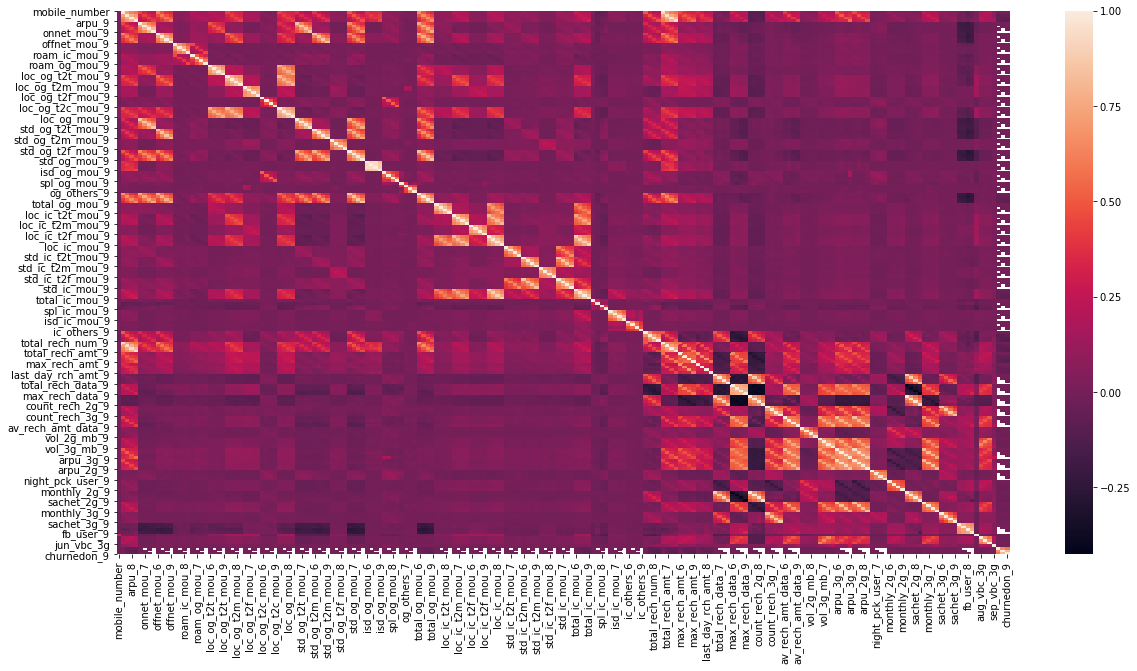

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(churn_corr)

In [45]:
churn_corr[:4]

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churnedon_7,churnedon_8,churnedon_9
mobile_number,1.000000,0.017617,0.01704,0.017017,0.022268,-0.004194,-0.006066,-0.007226,-0.010453,0.007079,...,-0.030838,-0.021177,0.321553,-0.019681,-0.017719,-0.022679,-0.004556,-0.007681,-0.009603,-0.008824
arpu_6,0.017617,1.000000,0.73210,0.633975,0.589611,0.451694,0.333694,0.271758,0.248101,0.620054,...,-0.072764,-0.027855,0.025443,0.173199,0.187360,0.223369,0.083447,-0.009347,0.003387,0.005639
arpu_7,0.017040,0.732100,1.00000,0.769030,0.691140,0.326034,0.433578,0.345396,0.290603,0.472056,...,-0.064672,-0.029171,0.023130,0.195489,0.224505,0.177183,0.095238,-0.064049,-0.055773,-0.041492
arpu_8,0.017017,0.633975,0.76903,1.000000,0.800302,0.252711,0.336372,0.428808,0.349882,0.381093,...,-0.023265,-0.014026,0.034620,0.233739,0.183912,0.165573,0.127523,-0.059460,-0.085465,-0.078390


In [46]:
churnls_highCorr = pd.DataFrame(columns=["FirstCol", "SecondCol", "Corr"]);
churnls_lowCorr = pd.DataFrame(columns=["FirstCol", "SecondCol", "Corr"]);
for val in churn_corr.columns:
    for index, data in churn_corr.loc[churn_corr.index != val, val].iteritems():
        if((val[:-2]!=index[:-2])):
            if((data>=0.9)):
                churnls_highCorr.loc[len(churnls_highCorr)] = sorted([index, val])+ [data]
                #churnls_highCorr.append([sorted([index, val])+ [data]]);
            if((data <= -0.35)):
                churnls_lowCorr.loc[len(churnls_lowCorr)] = sorted([index, val])+ [data]
                #churnls_lowCorr.append([sorted([index, val])+ [data]])

In [47]:
churnls_highCorr.drop_duplicates(keep="first",inplace=True)
churnls_lowCorr.drop_duplicates(keep="first",inplace=True)

In [48]:
pd.DataFrame(churnls_highCorr).sort_values("Corr", ascending=False)

,FirstCol,SecondCol,Corr
14,count_rech_2g_8,sachet_2g_8,0.982940
13,count_rech_2g_7,sachet_2g_7,0.982918
12,count_rech_2g_6,sachet_2g_6,0.980937
15,count_rech_2g_9,sachet_2g_9,0.976587
2,arpu_8,total_rech_amt_8,0.955952
0,arpu_6,total_rech_amt_6,0.953017
3,arpu_9,total_rech_amt_9,0.952310
1,arpu_7,total_rech_amt_7,0.951995
16,arpu_2g_6,arpu_3g_6,0.932232
17,arpu_2g_7,arpu_3g_7,0.930366


The most positively corelated data fields are :
1. count_rech_2g <--> sachet_2g
2. arpu <--> total_rech_amt
3. arpu_2g <--> arpu_3g
4. loc_ic_mou <--> total_ic_mou

1. As customers opt for larger 2g recharge packages higher the chances of customer availing service schemes with validity smaller than a month.
2. Higher the average revenue per user higher the total recharge amount. This obvious.
3. Higher the average revenue per user higher the average revenue per user for 2g. - Higher revenue users are opting for 2g.
4. Higher the local incoming minutes of usage - voice calls more the total incoming minutes of usage - voice calls. - Obvious

In [49]:
pd.DataFrame(churnls_lowCorr).sort_values("Corr", ascending=False)

,FirstCol,SecondCol,Corr
8,count_rech_2g_9,max_rech_data_7,-0.365439
15,count_rech_2g_6,max_rech_data_9,-0.365886
10,count_rech_2g_6,max_rech_data_8,-0.366525
0,count_rech_2g_6,max_rech_data_6,-0.367426
3,count_rech_2g_9,max_rech_data_6,-0.369040
12,count_rech_2g_8,max_rech_data_8,-0.371574
6,count_rech_2g_7,max_rech_data_7,-0.376248
5,count_rech_2g_6,max_rech_data_7,-0.376684
18,count_rech_2g_9,max_rech_data_9,-0.377001
2,count_rech_2g_8,max_rech_data_6,-0.377547


Most negatively Corelated:
1. max_rech_data <--> sachet_2g - as Maximum recharge data increases less likely is the customer to opt for sachet packages
2. count_rech_2g <--> max_rech_data - as the count of recharge of 2g increases lesser the maximum recharge of data.

In [50]:
set(uniqueColList)

{'arpu',
 'arpu_2g',
 'arpu_3g',
 'av_rech_amt_data',
 'count_rech_2g',
 'count_rech_3g',
 'date_of_last_rech',
 'date_of_last_rech_data',
 'fb_user',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_date_of_month',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'night_pck_user',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_data',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [52]:
churn_df.shape

(99999, 213)

In [55]:
churn_df.dropna(thresh=212)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churnedon_7,churnedon_8,churnedon_9
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,0,0,0
39,7001638780,134.945,130.827,122.780,122.773,0.00,0.00,0.00,0.00,4.36,...,1.0,1.0,424,0.00,0.00,0.00,0.00,0,0,0
44,7002055948,226.063,210.015,331.980,202.214,58.54,13.16,188.74,59.93,57.19,...,1.0,1.0,2715,238.20,75.15,114.42,0.00,0,0,0
53,7002188521,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,99.83,479.31,...,0.0,0.0,697,0.00,0.00,0.00,0.00,0,0,0
56,7002180748,452.624,320.548,368.807,281.710,34.46,43.11,50.61,27.49,131.59,...,1.0,1.0,729,277.97,535.63,1459.45,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99957,7002108597,1090.075,659.300,974.759,1061.843,196.99,70.01,251.91,464.26,1222.56,...,1.0,1.0,1214,1729.06,1151.35,0.00,235.08,0,0,0
99959,7001792051,268.845,594.676,603.593,1151.274,0.00,152.19,159.89,128.71,11.29,...,1.0,1.0,1923,64.43,65.21,0.00,0.00,0,0,0
99984,7000661676,328.594,202.966,118.707,324.143,423.99,181.83,5.71,5.03,39.51,...,1.0,1.0,820,0.00,0.00,0.00,0.00,0,0,0
99986,7001729035,644.973,455.228,564.334,267.451,806.73,549.36,775.41,692.63,784.76,...,1.0,1.0,2696,497.45,598.67,604.08,0.00,0,0,0


In [56]:
12369/99999

0.12369123691236912

Even if we take a thresh of 212 in given dataset, almost 87% of the data goes missing. Thus we will avoid dropna further.

## Data Derivation

As one of primary distinguishing feature of customers is prepaid and postpaid, Lets create one column to point if that customer is prepaid or postpaid.

In [57]:
churn_df.columns.values.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

| ColumnNames | Details |
|--------------|--------------------------------|
|'mobile_number'||
|'arpu'| Average revenue per user|
|'onnet_mou_6'|All kind of calls within the same operator network|
|'offnet_mou_6'|All kind of calls outside the operator T network|
|'roam_ic_mou_6'|Indicates that customer is in roaming zone during the call - Incoming|
|'roam_og_mou_6'|Indicates that customer is in roaming zone during the call - Outgoing|
|'loc_og_t2t_mou_6'|Local calls - within same telecom circle outgoing - Operator T to T|
|'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6' |Local calls - within same telecom circle outgoing - Operator T to other operator mobile|
|'loc_og_t2f_mou_6','loc_ic_t2f_mou_6' |Local calls - within same telecom circle outgoing/incoming - Operator T to fixed lines of T|
|'loc_og_t2c_mou_6'| Local calls - within same telecom circle outgoing - Operator T to its own call center|
|'loc_og_mou_6', 'loc_ic_mou_6' | Local calls - within same telecom circle Outgoing/Incoming |
|'std_og_t2t_mou_6', 'std_ic_t2t_mou_6' | STD calls - outside the calling circle outgoing Operator T to T|
|'std_og_t2m_mou_6', 'std_ic_t2m_mou_6' | STD calls - outside the calling circle outgoing Operator T to Other Operator mobile|
|'std_og_t2f_mou_6', 'std_ic_t2f_mou_6' | STD calls - outside the calling circle outgoing Operator T to Fixed lines of T|
|'std_og_mou_6', 'std_ic_mou_6' | STD calls - outside the calling circle outgoing minutes of usage-Voice|
|'isd_og_mou_6', 'isd_ic_mou_6' | ISD calls - outgoing minutes of usage voice|
|'spl_og_mou_6', 'spl_ic_mou_6' | Special Calls - outgoing mintues of usage voice|
|'og_others_6', 'ic_others_6' | Outgoing Others|
|'total_og_mou_6', 'total_ic_mou_6' | Total outgoing mintues of voice|
|'loc_ic_t2t_mou_6', | Local incoming Operator T To T|
|'total_rech_num_6', | Total Recharge number|
|'total_rech_amt_6' | Total Recharge amount - revisit|
|'max_rech_amt_6' | Max recharge amount - check if the total rech amount and max recharge amount is decreasing.|
|'date_of_last_rech_6'| |
|'last_day_rch_amt_6' | Last Recharge amount|
|'date_of_last_rech_data_6' | last Date of recharge Data|
|'total_rech_data_6'| Total Recharge data|
|'max_rech_data_6' | Max Recharge Data|
|'count_rech_2g_6' | Count Recharge 2g|
|'count_rech_3g_6' | Count Recharge 3g|
|'av_rech_amt_data_6' | average recharge amount data.|
|'vol_2g_mb_6' | Mobile internet usage volume (in MB) 2G|
|'vol_3g_mb_6' | Mobile internet usage volume (in MB) 3G|
|'arpu_3g_6' | average revenue per user for 3g |
|'arpu_2g_6' | average revenue per user for 2g|
|'night_pck_user_6' | Night package user - Prepaid|
|'monthly_2g_6' | Service schemes with validity equivalent to a month 2g|
|'sachet_2g_6' | Service schemes with validity smaller than a month 2G|
|'monthly_3g_6' | Service schemes with validity equivalent to a month 3G|
|'sachet_3g_6' |  Service schemes with validity smaller than a month 2G|
|'fb_user_6' | Service scheme to avail services of Facebook and similar social networking sites|
|'aon' | Age on network - number of days the customer is using the operator T network|
|'aug_vbc_3g' | Volume based cost - when no specific scheme is not purchased and paid as per usage 3g|
|'churnedon_7'||


From the above column information it looks like for customers related fields:
1. Prepaid:
    1. Sachet.
    2. Monthly
    3. VBC 
<br>Not Sure how to distinguish customers with Postpaid. Probably if the customer is paying the same amount.
Also Same customer may be having both Postpaid and prepaid.

In [78]:
churn_df.loc[churn_df["max_rech_amt_6"]==churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]]

,max_rech_amt_6,last_day_rch_amt_6,total_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,last_day_rch_amt_7,total_rech_amt_7,date_of_last_rech_7,max_rech_amt_8,last_day_rch_amt_8,total_rech_amt_8,date_of_last_rech_8,max_rech_amt_9,last_day_rch_amt_9,total_rech_amt_9,date_of_last_rech_9
0,252,252,362,2014-06-21,252,252,252,2014-07-16,252,252,252,2014-08-08,0,0,0,2014-09-28
1,44,44,74,2014-06-29,154,23,384,2014-07-31,65,30,283,2014-08-28,50,0,121,2014-09-30
5,120,120,120,2014-06-19,0,0,0,2014-07-17,130,0,130,2014-08-24,130,0,130,2014-09-28
9,110,110,220,2014-06-29,154,154,195,2014-07-23,50,30,210,2014-08-29,130,50,180,2014-09-20
10,0,0,0,2014-06-14,0,0,0,2014-07-05,30,20,324,2014-08-27,30,30,99,2014-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,50,50,380,2014-06-30,154,50,554,2014-07-28,154,50,504,2014-08-29,154,0,604,2014-09-29
99993,0,0,0,NaT,0,0,0,NaT,94,94,94,2014-08-08,0,0,0,NaT
99994,60,60,60,2014-06-03,110,0,110,2014-07-20,0,0,0,2014-08-26,50,0,50,2014-09-25
99997,202,202,381,2014-06-17,179,179,358,2014-07-19,179,179,716,2014-08-20,252,179,862,2014-09-17


In [80]:
churn_df.loc[churn_df["max_rech_amt_6"]!=churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]]

,max_rech_amt_6,last_day_rch_amt_6,total_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,last_day_rch_amt_7,total_rech_amt_7,date_of_last_rech_7,max_rech_amt_8,last_day_rch_amt_8,total_rech_amt_8,date_of_last_rech_8,max_rech_amt_9,last_day_rch_amt_9,total_rech_amt_9,date_of_last_rech_9
2,86,0,168,2014-06-17,200,200,315,2014-07-24,86,86,116,2014-08-14,100,0,358,2014-09-29
3,60,30,230,2014-06-28,50,50,310,2014-07-31,50,50,601,2014-08-31,50,30,410,2014-09-30
4,56,50,196,2014-06-26,110,110,350,2014-07-28,110,110,287,2014-08-09,50,50,200,2014-09-28
6,90,37,499,2014-06-28,37,24,222,2014-07-31,50,10,294,2014-08-28,30,24,141,2014-09-28
7,1580,0,1580,2014-06-27,790,0,790,2014-07-25,1580,779,3638,2014-08-26,0,0,0,2014-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,20,10,40,2014-06-11,46,23,149,2014-07-29,0,0,0,2014-08-24,36,30,146,2014-09-30
99991,60,30,120,2014-06-27,110,30,200,2014-07-31,130,130,260,2014-08-25,50,50,110,2014-09-28
99992,30,0,60,2014-06-27,30,30,180,2014-07-30,20,10,240,2014-08-30,20,10,220,2014-09-30
99995,110,0,110,2014-06-17,110,0,110,2014-07-17,149,149,182,2014-08-24,30,30,30,2014-09-26


Viewing the data we can say that the customers paying same recharge amount all through out the except ignoring the 0 are postpaid customers, wherease the customers paying differring amount for the 4 months are prepaid customers.

In [83]:
churn_df.loc[churn_df["max_rech_amt_6"]!=churn_df["last_day_rch_amt_6"], 
             ["max_rech_amt_6", "last_day_rch_amt_6", "total_rech_amt_6", "date_of_last_rech_6",
              "max_rech_amt_7", "last_day_rch_amt_7", "total_rech_amt_7", "date_of_last_rech_7",
             "max_rech_amt_8", "last_day_rch_amt_8", "total_rech_amt_8", "date_of_last_rech_8",
              "max_rech_amt_9", "last_day_rch_amt_9", "total_rech_amt_9", "date_of_last_rech_9"
             ]].head(1).values.tolist()

[[86,
  0,
  168,
  Timestamp('2014-06-17 00:00:00'),
  200,
  200,
  315,
  Timestamp('2014-07-24 00:00:00'),
  86,
  86,
  116,
  Timestamp('2014-08-14 00:00:00'),
  100,
  0,
  358,
  Timestamp('2014-09-29 00:00:00')]]

In [84]:
import collections 

In [98]:
custPostPaid = [];
for index, val in churn_df[["max_rech_amt_6", "last_day_rch_amt_6", "max_rech_amt_7", "last_day_rch_amt_7", 
                     "max_rech_amt_8", "last_day_rch_amt_8", "max_rech_amt_9", "last_day_rch_amt_9"]].iterrows():
    #Find the most common occurence of amount and mark that value as recharge amount and check count of the other values.
    freqAmount = dict(collections.Counter(val.values.tolist()))
    # the records should be only 2 and the other item should be 0
    if((len(freqAmount)==2)&(0 in freqAmount)):
        custPostPaid.append(1)
    else:
        custPostPaid.append(0)

In [99]:
collections.Counter(custPostPaid)

Counter({1: 8625, 0: 91374})

In [100]:
churn_df["IsPostPaid"] = custPostPaid

In [101]:
churn_df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'churnedon_7', 'churnedon_8', 'churnedon_9',
       'IsPostPaid'],
      dtype='object', length=214)

<b>The IsPostPaid needs to be verified</b>

Definitions of churn:
1. Revenue Based Churn - Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
2. Usage Based Churn - Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

For Revenue based churn we have to look at the columns total/average/median(arpu, arpu_2g and arpu_3g)<= 4

In [110]:
revenueBasedChurn = [];
for index, val in churn_df[["arpu_6", "arpu_7", "arpu_8", "arpu_9",
                           "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9",
                           "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9",]].iterrows():
    #print(val.values.tolist())
    if( (sum(val.values.tolist()) <=4) or
       (np.mean(val.values.tolist()) <=4) or
       (np.median(val.values.tolist()) <=4)
    ):
        revenueBasedChurn.append(1);
    else:
        revenueBasedChurn.append(0);

In [111]:
collections.Counter(revenueBasedChurn)

Counter({0: 97355, 1: 2644})

In [112]:
churn_df["revenueBasedChurn"] = revenueBasedChurn

For usage based churn, all the columns with mou and columns vol_2g_mb, vol_3g_mb should be 0. 

In [116]:
usageCols = [val for val in churn_df.columns.values if(("mou" in val) or("vol_2g_mb" in val) or ("vol_3g_mb" in val))]

In [134]:
usageBasedChurn = [];
col6 = [col for col in usageCols if("_6" in col)]
col7 = [col for col in usageCols if("_7" in col)]
col8 = [col for col in usageCols if("_8" in col)]
col9 = [col for col in usageCols if("_9" in col)]
#print(col6)
for index, val in churn_df[usageCols].iterrows():
    #print(val[col6].values)
    
    if((sum(val[col6].values.tolist()) ==0) or (sum(val[col7].values.tolist()) ==0) 
    or (sum(val[col8].values.tolist()) ==0) or (sum(val[col9].values.tolist()) ==0)):
        usageBasedChurn.append(1);
    else:
        usageBasedChurn.append(0)

In [135]:
collections.Counter(usageBasedChurn)

Counter({0: 99999})